# THX ASA

In [168]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def mag2db(mag):
    return 20 * np.log10(np.maximum(mag, 1e-15))

def db2mag(db):
    return 10 ** (db / 20)

def plot_response(w, h):
    fig, ax = plt.subplots()
    ax.title.set_text('Filter Frequency Response and Phase Response')
    ax.semilogx(w, np.abs(h), 'b')
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Magnitude [dB]')
    ax.grid(which='both', axis='both')

    ax2 = ax.twinx()
    ax2.semilogx(w, np.angle(h), 'r')
    ax2.set_ylabel('Phase [radians]', color='r')
    ax2.grid(which='both', axis='both')

    # ax2 ensure the y-axis tick marks show common phase angles
    ax2.yaxis.set_major_locator(plt.MultipleLocator(base=np.pi/4))

    # ax2 format tick marks as multiples of pi/4 with mixed fractions
    def pi_formatter(x, _):
        pi = np.pi
        if x == 0:
            return "0"
        sign = "-" if x < 0 else ""
        x = abs(x)
        if x == pi:
            return f"{sign}$\pi$"
        elif x == pi / 2:
            return f"{sign}$\pi/2$"
        elif x == pi / 4:
            return f"{sign}$\pi/4$"
        elif x == 3 * pi / 4:
            return f"{sign}$3\pi/4$"
        else:
            return f"{sign}{x/pi:.2g}$\pi$"
    
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(pi_formatter))

    plt.show()


## Transfer function A - $2^{nd}$ order all-pass f = 3200Hz Q = 0.12

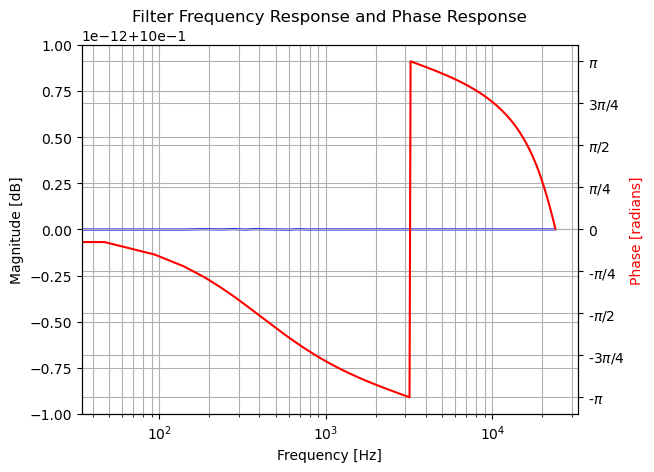

In [175]:
b = np.array([-0.2578122715960877, -0.6780222280014745, 1])
a = np.array([1, -0.6780222280014745, -0.2578122715960877])

A_response = scipy.signal.freqz(b, a, plot=plot_response, fs=48000)


## Transfer function B

### B - $1^{st}$ order shelf having a gain of 0dB at low frequencies and turn-over frequencies of 200 and 2000Hz

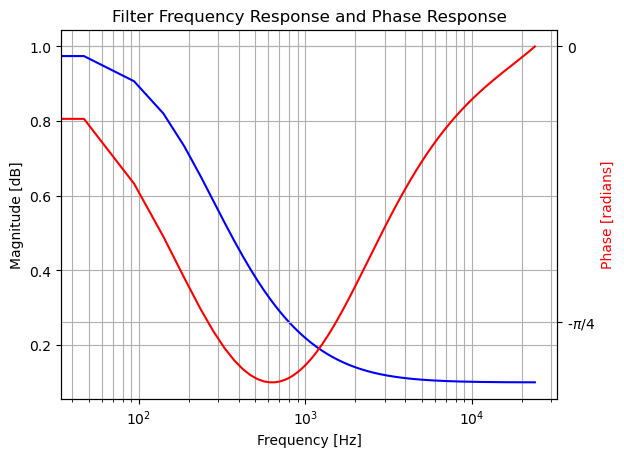

In [174]:
b = np.array([0.1116287524375113, -0.08578708035415286])
a = np.array([1, -0.9741583279166416])

[w, h] = scipy.signal.freqz(b, a, plot=plot_response, fs=48000)


### B - $2^{nd}$ order all-pass with f = 125Hz Q = 0.12

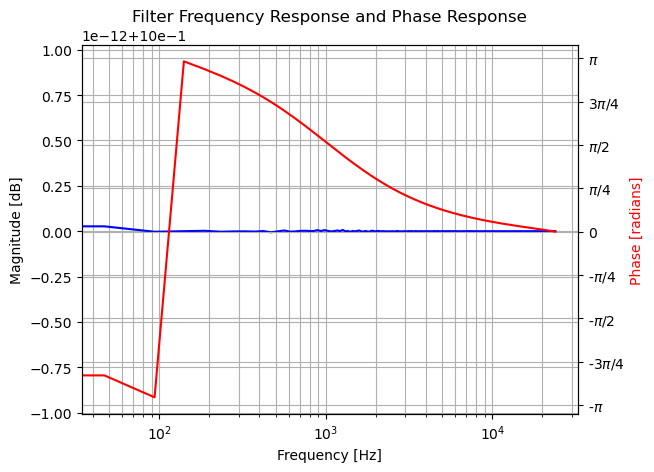

In [176]:
b = np.array([0.8723543367983998, -1.872103699532835, 1])
a = np.array([1, -1.872103699532835, 0.8723543367983998])

[w, h] = scipy.signal.freqz(b, a, plot=plot_response, fs=48000)

### Total Transfer Function of B when cascaded

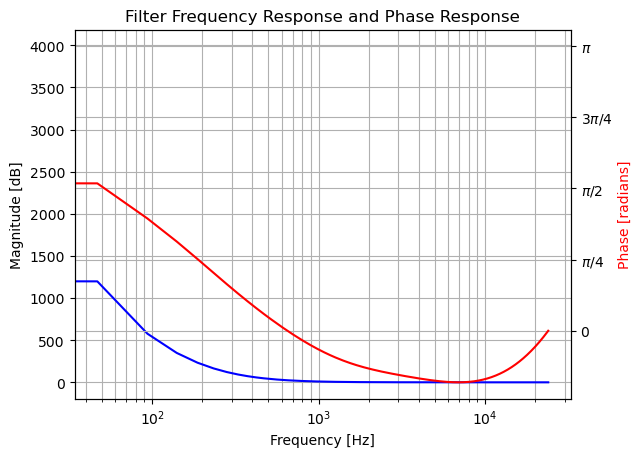

In [178]:
sos = np.array([[0.1116287524375113, -0.08578708035415286, 0, 1, -0.9741583279166416, 0],
                [0.8723543367983998, -1.872103699532835, 0, 1, -1.872103699532835, 0.8723543367983998]])
B_response = scipy.signal.sosfreqz(sos, fs=48000)
plot_response(*B_response)

# Details

THX ASA is not exactly Blumein nor is it exactly Gerzon.

The important differences;
1. Gerzon adapts Blumlein such that the energy of the original wave is conserved.
1. Blumlein's original system is designed to use two loudspeakers to reproduce a sound to be perceived to have originated at a certain distance from the center of a screen.
    - See `blumlein` directory for a notebook describing Blumeien in detail.